## Machine Learning

### causalimpact: Find Causal Relation of an Event and a Variable in Python	

In [ ]:
!pip install pycausalimpact

When working with time series data, you might want to determine whether an event has an impact on some response variable or not. For example, if your company creates an advertisement, you might want to track whether the advertisement results in an increase in sales or not.

That is when causalimpact comes in handy. causalimpact analyses the differences between expected and observed time series data. With causalimpact, you can infer the expected effect of an intervention in 3 lines of code.

In [13]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima_process import ArmaProcess
import causalimpact
from causalimpact import CausalImpact

# Generate random sample

np.random.seed(0)
ar = np.r_[1, 0.9]
ma = np.array([1])
arma_process = ArmaProcess(ar, ma)

X = 50 + arma_process.generate_sample(nsample=1000)
y = 1.6 * X + np.random.normal(size=1000)

# There is a change starting from index 800
y[800:] += 10

<IPython.core.display.Javascript object>

In [14]:
data = pd.DataFrame({"y": y, "X": X}, columns=["y", "X"])
pre_period = [0, 799]
post_period = [800, 999]

<IPython.core.display.Javascript object>

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    90.03              18006.16
Prediction (s.d.)         79.97 (0.3)        15994.43 (60.49)
95% CI                    [79.39, 80.58]     [15878.12, 16115.23]

Absolute effect (s.d.)    10.06 (0.3)        2011.72 (60.49)
95% CI                    [9.45, 10.64]      [1890.93, 2128.03]

Relative effect (s.d.)    12.58% (0.38%)     12.58% (0.38%)
95% CI                    [11.82%, 13.3%]    [11.82%, 13.3%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))
Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 90.03. By contrast, in the absence of an
intervention, we would have expected an average response of 79.97.
The 95% interval of this counterfactual prediction is [79.39, 80.58].
Subtracting this predictio

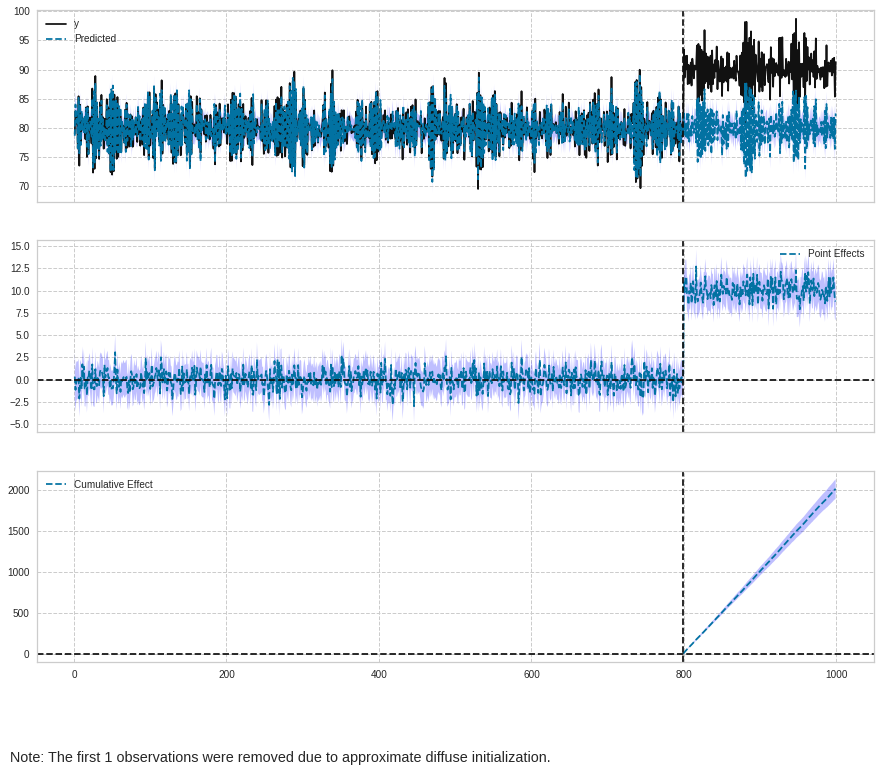

<IPython.core.display.Javascript object>

In [15]:
ci = CausalImpact(data, pre_period, post_period)
print(ci.summary())
print(ci.summary(output="report"))
ci.plot()

### Pipeline + GridSearchCV: Prevent Data Leakage when Scaling the Data

Scaling the data before using GridSearchCV can lead to data leakage since the scaling tells some information about the entire data. To prevent this, assemble both the scaler and machine learning models in a pipeline then use it as the estimator for GridSearchCV. Above is an example.

The estimator is now the entire pipeline instead of just the machine learning model.

In [16]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.datasets import load_iris

# load data
df = load_iris()
X = df.data
y = df.target

# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Create a pipeline variable
make_pipe = make_pipeline(StandardScaler(), SVC())

# Defining parameters grid
grid_params = {"svc__C": [0.1, 1, 10, 100, 1000], "svc__gamma": [0.1, 1, 10, 100]}

# hypertuning
grid = GridSearchCV(make_pipe, grid_params, cv=5)
grid.fit(X_train, y_train)

# predict
y_pred = grid.predict(X_test)

<IPython.core.display.Javascript object>

### Decompose high dimensional data into two or three dimensions

In [ ]:
!pip install yellowbrick

If you want to decompose high dimensional data into two or three dimensions to visualize it, what should you do? A common technique is PCA. Even though PCA is useful, I always find it complicated to create a PCA plot until I found Yellowbrick.

I really recommend using this tool if you want to visualize PCA in a few lines of code

In [17]:
from yellowbrick.datasets import load_credit
from yellowbrick.features import PCA

<IPython.core.display.Javascript object>

In [18]:
X, y = load_credit()
classes = ["account in defaut", "current with bills"]

<IPython.core.display.Javascript object>

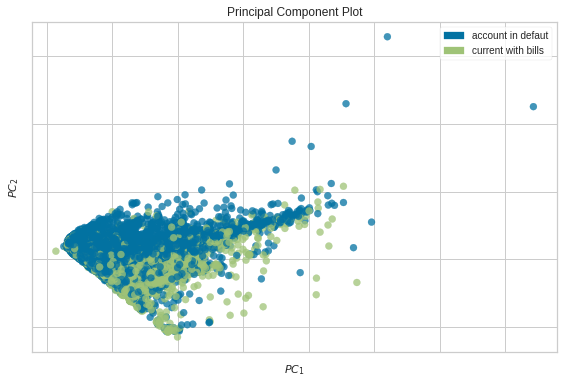

<AxesSubplot:title={'center':'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

<IPython.core.display.Javascript object>

In [19]:
visualizer = PCA(scale=True, classes=classes)
visualizer.fit_transform(X, y)
visualizer.show()

[Link to Yellowbrick](https://www.scikit-yb.org/en/latest/)

### squared=False: Get RMSE from Sklearn’s mean_squared_error method

If you want to get the root mean squared error using sklearn, pass `squared=False` to sklearn’s `mean_squared_error` method.

In [42]:
from sklearn.metrics import mean_squared_error

y_actual = [1, 2, 3]
y_predicted = [1.5, 2.5, 3.5]
rmse = mean_squared_error(y_actual, y_predicted, squared=False)
rmse

0.5

<IPython.core.display.Javascript object>